**INFLUENCE OF EMPLOYMENT ON PRICE OF HOUSES**

Authored By: Dhruvil Mehta
Duration: 90 mins
Level: Intermediate
Pre-requisite skills: Python, Pandas, Matplotlib


**USE CASE SCENARIO**
This use case examines the correlation between industry employment statistics and median house prices in designated geographical regions. This scenario seeks to reveal insights by integrating these information, specifically examining the correlation between job availability or distribution across industries (e.g., financial services, healthcare, retail, and hospitality) and housing affordability in various locations.

The example illustrates data pretreatment methods, normalisation for uniform comparison, and data visualisation for detecting trends or patterns.
- Illustrative Practical Situation: Urban Development and Policy Formulation: This approach aids city planners, economists, and policymakers in comprehending the impact of employment possibilities in particular sectors on housing markets. For example:
-Are house prices elevated in regions with a greater concentration of employment in finance or healthcare?
-Is there a significant association between affordable housing and the retail or hospitality sectors?
Essential Characteristics of the Use Case:
-Integrating and preparing datasets.
-Addressing absent values and discrepancies in the data.
-Standardising data for comparative analysis.
-Analysing trends to discern correlations between work and housing.


**WHAT THE USE CASE TEACHES US**
This use case teaches foundational and intermediate data analysis skills, focusing on real-world scenarios. Specifically:
1. Data Preprocessing Skills
- How to clean data by handling missing values and inconsistencies.
- Standardizing data (e.g., converting area names to lowercase) for better merging.
2. Data Integration and Normalization
- How to merge two datasets with common keys for unified analysis.
- Techniques to normalize data using MinMaxScaler to enable fair comparisons across columns with different scales.
3. Exploratory Data Analysis (EDA)
- Using visualizations (e.g., histograms and scatterplots) to uncover trends and correlations.
- Understanding data distributions and identifying potential skewness or outliers.
4. Practical Insight Derivation
- How to analyze correlations between employment in specific industries and housing prices.
- How employment and housing data can influence decision-making in urban planning, economics, and policy development.

**PROJECT GOALS**
1. Data Preparation and Cleansing:
-Effectively cleanse and preprocess two datasets: employment data and house prices.
-Standardise and normalise data to guarantee compatibility and precision in the analysis.
2. Data Integration:
-Consolidate the two datasets according to geographical regions to generate a cohesive dataset for analysis.
3. Identification of Trends:
- Examine the correlation between sector-specific employment statistics and median property values.
- Utilise visualisations to accurately depict data patterns and distributions.
4. Analysis of Correlation:
- Identify the industries (e.g., healthcare, finance, hospitality) that exhibit greater relationships with median house prices.
5. Practical Insights:
Extract actionable information applicable to urban planning, housing affordability research, or economic policy formulation.

**PROJECT OUTCOMES**
1. Curated and Consolidated Dataset:
- A consolidated and standardised dataset integrating job data with home prices, prepared for subsequent study.
2. Advanced Data Analytics Proficiencies:
- An enhanced comprehension of managing absent data, anomalies, standardisation, and dataset integration.
3. Visual Analysis:
- Lucid, interpretable graphs illustrating distributions, relationships, and correlations between job and housing data.
4. Practical Applications:
-Analysis of how employment trends within industries influence housing markets, suitable for presentation to stakeholders such as politicians, researchers, or urban planners.
5. Readiness for Complex Initiatives:
- Enhanced expertise in utilising Python libraries (pandas, seaborn, matplotlib, etc.) and methodologies for data-driven decision-making.

**INITIALIZATION**

Employment Data:
   Census year  Block ID              CLUE small area  \
0         2018      1101                    Docklands   
1         2018      1107                    Docklands   
2         2018      1109                    Docklands   
3         2018      1110                    Docklands   
4         2018      1111  West Melbourne (Industrial)   

   Accommodation and Food Services  Administrative and Support Services  \
0                            565.0                                 38.0   
1                              NaN                                  0.0   
2                            437.0                                170.0   
3                            203.0                                  NaN   
4                              0.0                                  0.0   

   Agriculture, Forestry and Fishing  Arts and Recreation Services  \
0                                0.0                           6.0   
1                                0.0             

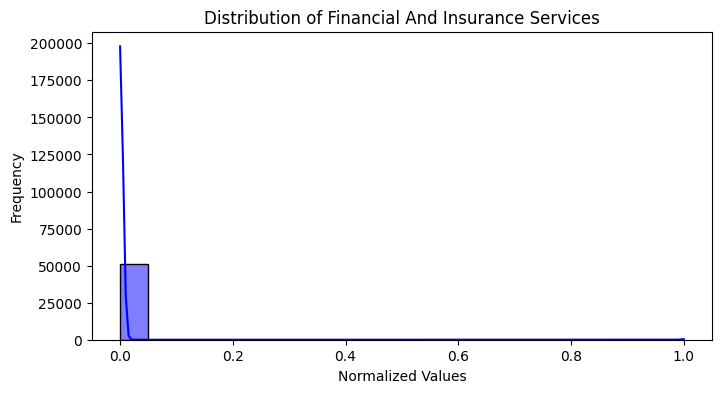

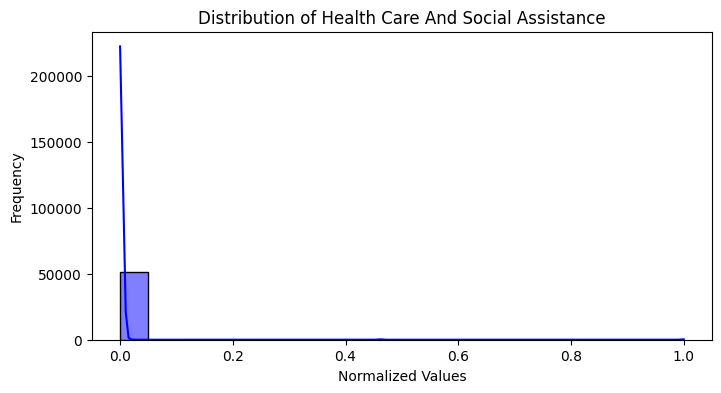

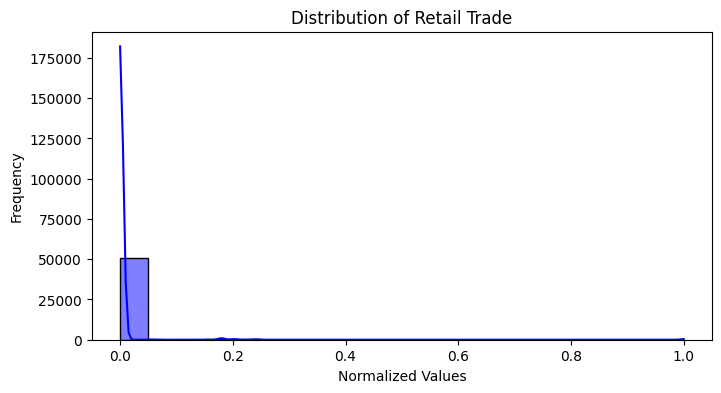

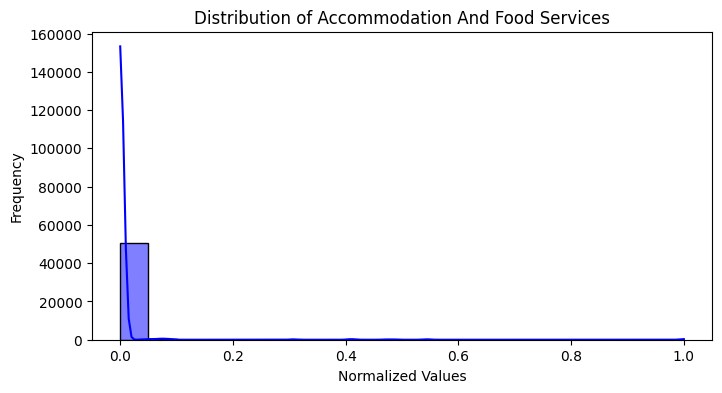

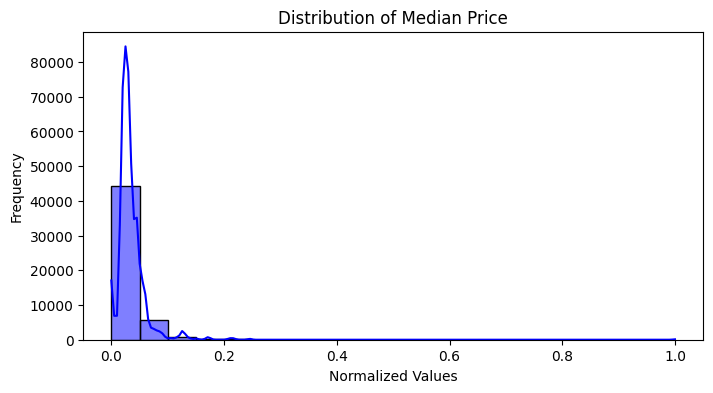

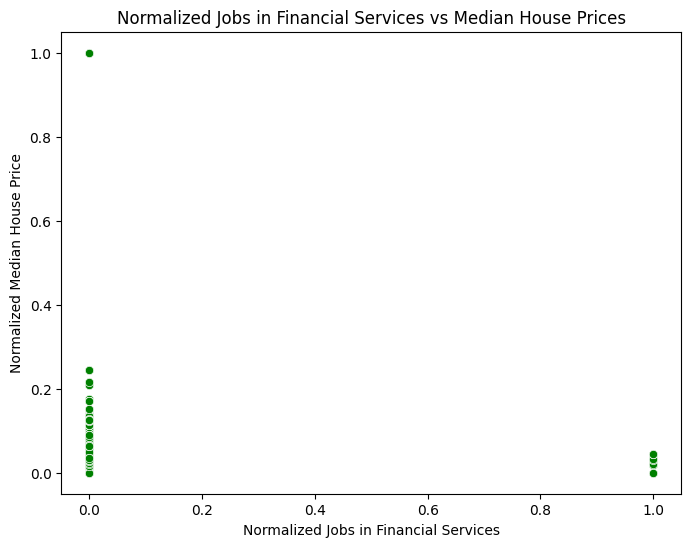

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading datasets
employment_data = pd.read_csv("C:/Users/dhruv/Downloads/Team project a/employment-by-block-by-anzsic.csv")  
housing_data = pd.read_csv("C:/Users/dhruv/Downloads/Team project a/house-prices-by-small-area-transfer-year.csv")  

# Displaying the first few rows of the datasets to understand their structure
print("Employment Data:")
print(employment_data.head())

print("\nHousing Data:")
print(housing_data.head())

# Step 1: Handling Missing Values
print("\nChecking for missing values:")
print("Employment Data:")
print(employment_data.isnull().sum())
print("Housing Data:")
print(housing_data.isnull().sum())

# Filling missing values in house prices with the mean
housing_data['Median_Price'] = housing_data['Median_Price'].fillna(housing_data['Median_Price'].mean())

# Dropping rows with missing values in employment data (if any)
employment_data.dropna(inplace=True)

# Confirming no missing values remain
print("\nAfter handling missing values:")
print("Employment Data:")
print(employment_data.isnull().sum())
print("Housing Data:")
print(housing_data.isnull().sum())

# Step 2: Standardizing Geographical Areas
# Converting area names to lowercase for consistency
employment_data['CLUE small area'] = employment_data['CLUE small area'].str.lower()
housing_data['Small_Area'] = housing_data['Small_Area'].str.lower()


# Step 3: Merging Datasets
merged_data = pd.merge(employment_data, housing_data, left_on='CLUE small area', right_on='Small_Area', how='inner')

print("\nMerged Dataset:")
print(merged_data.head())
print(merged_data.columns)

# Step 4: Normalizing Data for Consistent Analysis
from sklearn.preprocessing import MinMaxScaler

# Selecting columns to normalize
columns_to_normalize = [
    'Financial and Insurance Services', 
    'Health Care and Social Assistance', 
    'Retail Trade', 
    'Accommodation and Food Services',  
    'Median_Price'
]

scaler = MinMaxScaler()
merged_data[columns_to_normalize] = scaler.fit_transform(merged_data[columns_to_normalize])

print("\nNormalized Dataset:")
print(merged_data.head())
merged_data.to_csv('cleaned_data.csv', index=False)

# Step 5: Visualizing Data (Optional)
# Plotting normalized employment data for key industries
industries = [
    'Financial and Insurance Services', 
    'Health Care and Social Assistance', 
    'Retail Trade', 
    'Accommodation and Food Services',  
    'Median_Price'
]
for industry in industries:
    plt.figure(figsize=(8, 4))
    sns.histplot(merged_data[industry], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {industry.replace('_', ' ').title()}")
    plt.xlabel("Normalized Values")
    plt.ylabel("Frequency")
    plt.show()

# Scattering plot for median house prices vs financial services jobs
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=merged_data, 
    x='Financial and Insurance Services', 
    y='Median_Price',  
    color='green'
)
plt.title("Normalized Jobs in Financial Services vs Median House Prices")
plt.xlabel("Normalized Jobs in Financial Services")
plt.ylabel("Normalized Median House Price")
plt.show()



** REFERENCES**
1. https://data.melbourne.vic.gov.au/explore/dataset/employment-by-block-by-anzsic/information/
2. https://data.melbourne.vic.gov.au/explore/dataset/house-prices-by-small-area-transfer-year/information/
